# Chi Squared

This is a quick notebook to demonstrate that pointwise squaring of a Gaussian is the same distribution you would get if you invoked a Chi squared method in some library.  The reason for phrasing it like this is that `numpy` and other tools often simply draw from independent Gaussians, one for each degree of freedom, and sum them.  That said, the arithmetic we are doing is virtually identical to the arithmetic done by the library.  After this is demonstrated, we will look briefly at finding numerical approximations to the normal Chi squared tables using the cumulative distribution.

First we will plot the simple Gaussian.

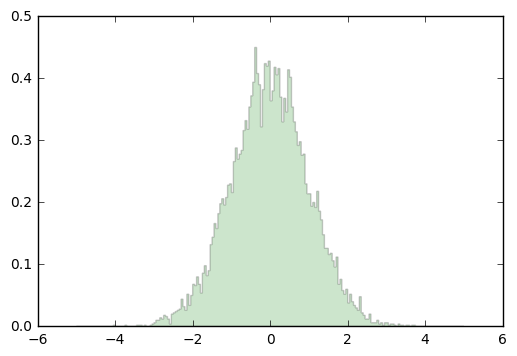

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g = [np.random.normal(0, 1) for x in range(10000)]
plt.hist(g, 200, range=(-5,5), normed=True, facecolor='green', alpha=0.2, histtype='stepfilled')

plt.show()

Next generate the square of these elements.  

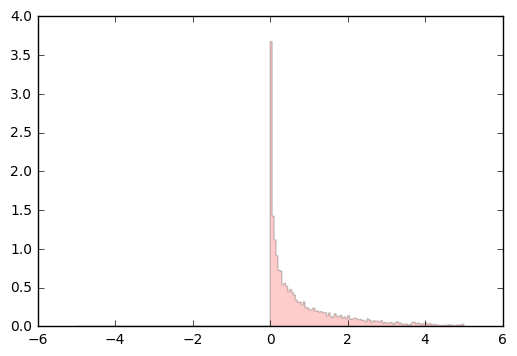

In [2]:
# Generate the base Gaussian
g = [np.random.normal(0, 1) for x in range(10000)]

# Generate the square of each element
c = [x**2 for x in g]
plt.hist(c, 200, range=(-5,5), normed=True, facecolor='red', alpha=0.2, histtype='stepfilled')

plt.show()

Next we can prove for ourselves that the Chi squared library method generates a distribution that is immaterially different than what we generated.

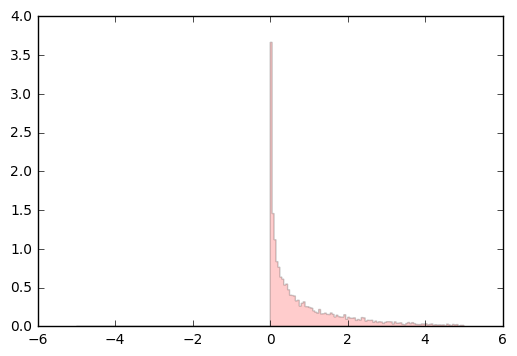

In [3]:
# Generate Chi squared based on library function
c = [np.random.chisquare(1) for x in range(10000)]
plt.hist(c, 200, range=(-5,5), normed=True, facecolor='red', alpha=0.2, histtype='stepfilled')

plt.show()

In order to estimate values like what one would find in a Chi squared table, we can simply generate a numerical (as opposed to graphical) histogram, convert this to a cumulative distribution and then directly identify estimated values.

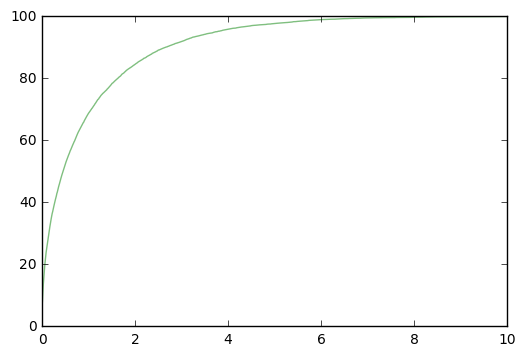

In [4]:
# Generate Chi squared based on library function
c = [np.random.chisquare(1) for x in range(10000)]

# Generate the values and edges of a histogram
v, e = np.histogram(c, bins=1000, range=(0,10), density=True)

# Generate cumulative sum of the values
v = np.cumsum(v)

# Generate support set from the edges (to plot)
sup = [(e[i] + e[i+1]) / 2 for i in range(len(e)-1)]

# Plot the CDF
plt.plot(sup, v, color='green', alpha=0.5)  
plt.show()


Another options is zip the list and then filter the values near what you are looking for and see the list contents.

In [5]:
# Generate Chi squared based on library function
c = [np.random.chisquare(1) for x in range(1000000)]

# Generate the values and edges of a histogram
v, e = np.histogram(c, bins=1000, range=(0,10), density=True)

# Generate cumulative sum of the values
v = np.cumsum(v) / 100

# Generate support set from the edges (to plot)
sup = [(e[i] + e[i+1]) / 2 for i in range(len(e)-1)]

# Zip the lists and print them
l = zip(sup, v)
    
# Fetch values within a small tolerance of what you might be looking for
val = 0.95
tol = 0.001
res = []
for x in l:
    if (math.fabs(x[1] - val) < tol):
        print(x)


(3.7450000000000001, 0.94900129795212051)
(3.7549999999999999, 0.94932778899464854)
(3.7650000000000001, 0.94963925744319511)
(3.7750000000000004, 0.94997976957343899)
(3.7850000000000001, 0.95028923500945472)
(3.7949999999999999, 0.95059369291414331)
(3.8050000000000002, 0.95088212671858519)


Below is an image from a standard Chi squared table.  You will not that we are a little off (table value for the 5% tail and one DOF is 3.841), which could be attributed to insufficient sampled data, insifficient range in our histogram, a baseline Gaussian that is not entirely independently distributed, etc.

<img src="../images/ChiSquare.jpg">